### Let's try to evaluate heatmaps using the methods that were discussd:

In [5]:
import numpy as np
import os
import pandas as pd
from pathlib import Path

##### Method1:
- Consistency within group.
- For Consistency within groups, we need first to upload heatmaps
- Then we compute pearsen corrolation between samples in each group
- Then we take mean over these pearson corrolations 
- We can interpret these corrolations as belwo 
- If the maps are consistent within group (high correlation) but different across groups (low inter-group correlation), you’ve quantitatively shown the difference is meaningful, not random.

- Interpreting the mean of pearson corrolations:

 - **High r(close to 1)**: Heatmaps across subjects in that group look similar → the model is focusing on roughly the same regions for all samples of that group. 

 - **Low r(close to 0)**: Heatmaps vary a lot from sample to sample → the model’s focus is heterogeneous inside that group.

 - **Negative r**: Rare, means the model focuses on opposite regions across samples (e.g., some highlight left side, some right). Usually indicates instability or small-sample noise.


In [2]:
def mean_corrs(H):
    import itertools, numpy as np
    rs = []
    for i, j in itertools.combinations(range(len(H)), 2):
        rs.append(np.corrcoef(H[i].ravel(), H[j].ravel())[0,1])
    return np.mean(rs)

#r1 = mean_corrs(H_group1)
#r2 = mean_corrs(H_group2)
#print("mean within-group correlations:", r1, r2)


In [3]:
### Experimen with GradCAM and on my test-set, the EX-AI method: Grad-CAM
### Goal of experiment is to see if the results are consistent with the results on the original dataset that I used

# Exp: cam-fnt-test : 
# Expl: I used grad_cam from second implimentation (gradcam2.py)
# bs = 100
# n,m = 100 number of samples in each group
# I am using the fine-tuned model on ADNI dataset and first and second group

base = '../'
heatmap_dir = os.path.join(base, 'heatmaps') 
n_sample = 100
m1 = 100

# name of explanation method
expl = 'cam'
# name of experiment to get heatmaps 
exp = 'cam-fnt-test'


path_heatmaps1 = os.path.join(heatmap_dir,f'gr1_{100}_{m1}_{expl}_{exp}.npy')
path_heatmaps2 = os.path.join(heatmap_dir,f'gr2_{100}_{m1}_{expl}_{exp}.npy')
heat_gr1_fnt_test = np.load(path_heatmaps1)
heat_gr2_fnt_test = np.load(path_heatmaps2)
print(heat_gr1_fnt_test.shape)
print(heat_gr2_fnt_test.shape)

(100, 256, 256)
(100, 256, 256)


In [6]:
## Checking for within group consistency 
# r1: mean corrolations within group1
# r2: mean corrolations within group2
r1 = mean_corrs(heat_gr1_fnt_test)

r2 = mean_corrs(heat_gr2_fnt_test)

print(f'r1:{r1:0.4f}, r2:{r2:0.4f}')

r1:0.8986, r2:0.8323


- Based on the above interpretation of mean of person coefficints (r), Heatmaps within the groups are consistents. 

- Now, we look at `r_between` to see if heatmaps are highly corrolated or not. 

- High `𝑟_{between}` ->  both groups’ average heatmaps look alike → model focuses on same anatomy.

- Low `r_{between}`-> Low or negative  → average heatmaps differ → model’s focus differs between groups.

In [8]:
r_between = np.corrcoef(heat_gr1_fnt_test.mean(0).ravel(),
                        heat_gr2_fnt_test.mean(0).ravel())[0,1]

print(f'r_between: {r_between:0.4f}')

r_between: 0.9920


High r1, r2 : model focuses on that region consistently across subjects. ✅

High r_{between}: same region in both groups. ✅ → expected, because it’s the same anatomy that defines the difference.

In [9]:
## run the code
## vis2samtestdr.py generates heatmpas
## for that you need to set following parameters in vis2samtestdr.py

## 

# exp = 'cam++-fnt-test' => you can give any name that you want to this experiment
# corrupted': False => if you do not want to use corrupted images for group 1
# deg: None => degree of corruption
# ckp: 'fnt' => checkpoint to use for generating heatmaps => it uses a fine-tuned model on two groups 
# as a binary classification
# expl: 'cam' => uses GradCAM as explainability method, you can also set it to GradCAM++
# dst: 'test' => uses test set for generating heatmaps, (corr) uses a orrupted test set, where second group 
# is a corruption of first group => set it as 'test' if you want to use original test set
# model_path: path to the fine-tuned model checkpoint
# target_layer: '0.7.2.conv3' => target layer for GradCAM, if you are using suppr model then set it to '7.2.conv3'
# the rest of parameters can be used as it is

# so we can run code as below 


/sc/home/masoumeh.javanbakhat/netstore-old/Baysian/3D/Explainability/AdniGithub
project_root:/sc/home/masoumeh.javanbakhat/netstore-old/Baysian/3D/Explainability/AdniGithub
Using test set for getting embeddings
['test0', 'test1']
Data Loaders were built!
Using fine-tunned model on two groups of data without corruption (False)
ckp_dir:/sc/home/masoumeh.javanbakhat/netstore-old/Baysian/3D/Explainability/AdniGithub/adni_results/ckps/model_finetun_last_10_False.pt
##########################################
fine-tuned model laoded from chekpoint-dir
##########################################
images shape in get_mean_embeddings:torch.Size([100, 3, 256, 256])
images shape in get_mean_embeddings:torch.Size([100, 3, 256, 256])
group0_mean:torch.Size([2048])
group1_mean:torch.Size([2048])
##########################
test_statistic:1.1200
##########################


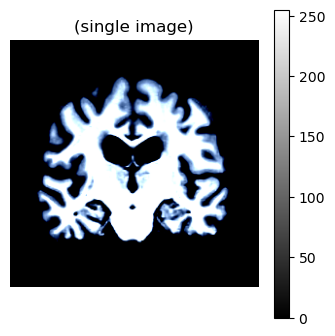


Getting gradient in generate:torch.Size([100, 2048, 8, 8])

Getting activations in generate:torch.Size([100, 2048, 8, 8])

Getting cam before relu in generate:torch.Size([100, 1, 8, 8])
attributions shape in process_attributions:(100, 256, 256)


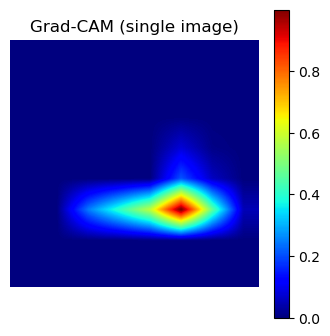

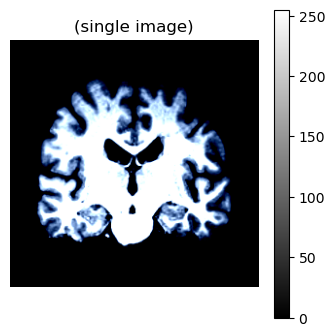


Getting gradient in generate:torch.Size([100, 2048, 8, 8])

Getting activations in generate:torch.Size([100, 2048, 8, 8])

Getting cam before relu in generate:torch.Size([100, 1, 8, 8])
attributions shape in process_attributions:(100, 256, 256)


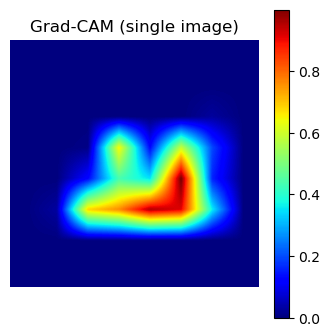

Test statistic (MMD): 1.2545, p-value: 0.0010
gr1:(100, 256, 256)
gr2:(100, 256, 256)
Heatmaps were created


In [1]:
from pathlib import Path
import sys
from argparse import Namespace

%cd /sc/home/masoumeh.javanbakhat/netstore-old/Baysian/3D/Explainability/AdniGithub
project_root = Path.cwd()

print(f'project_root:{project_root}')

src_dir = project_root / "src"
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

sys.path.insert(0, str(src_dir))   # <- add this line

from src.vis2samtestdr import *  # adjust import

#from src.gradcam2 import *

args = Namespace(
    exp='cam-fnt-test-eval',
    annot_path='/sc/projects/sci-lippert/chair/adni_t1_mprage/T1_3T_coronal_slice/T1_3T_coronal_mni_linear_hippo_resolution256/group_by_hippocampus/adni_T1_3T_linear_annotation.csv',
    sav_gr_np=False,
    corrupted=False,
    deg='None',
    ckp='fnt',
    expl='cam',
    img_path='/sc/projects/sci-lippert/chair/adni_t1_mprage/T1_3T_coronal_slice/T1_3T_coronal_mni_linear_hippo_resolution256/group_by_hippocampus',
    n=100, m=100, bs=100,
    dst='test',
    idx=0,
    random_state=42,
    model_path='adni_results/ckps/model_finetun_last_10_False.pt',
    target_layer='0.7.2.conv3'
)

experiment = TestStatisticBackprop(args)
group0_attr, group1_attr = experiment.run()
ov1, ov2 = experiment.overlay_hetmap(idx=args.idx, alpha=0.5)


In [2]:
print(group0_attr.shape)
print(group1_attr.shape)

(100, 256, 256)
(100, 256, 256)


- The above code, laod the test-set that you want in terms of two groups.

- The images and heatmaps that you saw there, ae only the first image and corresponding heatmap of that image 
(it's just a sanity check).

- Then, it converts numpy arrays to torch tensors, and make datloaders

- So, if you want to purturb data, it's enough you load numpy array of two groups, putrurb them, and save them in a directory, then just add this as: another option for dataset, `_load_test_set(self)`, then we make dataloders from this purturbed dataset, and you can easilly make heatmaps from this purtubed dataset. 

- Because in this setting, I need to compute embeddings from images, we need to compute embeddings dynamically.
 